In [1]:
# Se importan las librerías necesarias
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from webdriver_manager.chrome import ChromeDriverManager
chromeOptions = webdriver.ChromeOptions()
import pandas as pd
import numpy as np
import math
import time
import os
import requests
import PyPDF2
import re
from encodings.utf_8 import encode
from ipaddress import NetmaskValueError
import camelot
import tabula  

In [2]:
# Se configura el driver
chromeOptions.add_argument('--headless')
driver = webdriver.Chrome(executable_path=ChromeDriverManager().install(), options = chromeOptions)

# Abrimos el navegador y recorremos la página buscando todos los href, y se almacenan en lista.
url_presupuesto = 'https://www.dipres.gob.cl/597/w3-multipropertyvalues-15168-35324.html#proyecto_programa'
driver.get(url_presupuesto)
elems = driver.find_elements("xpath", "//a[@title='Ir a Documento PDF : Cuadro Comparativo Analítico Años 2022-2023']")
links = []
for elem in elems:
    links.append(elem.get_attribute("href"))
time.sleep(20)
driver.close()

/Users/josemora/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
links = pd.DataFrame(links)

# Descargamos los archivos y cerramos la conexión
i = 0
for url in links[0]:
    r = requests.get(url, stream=True)
    with open('analiticos/'+ str(i) + '.pdf', 'wb') as f:
        f.write(r.content)
    time.sleep(1)
    i+=1

In [28]:
# Leemos todos los archivos para saber cuantas páginas tienen ya que dependiendo de eso tendrán tratamientos distintos.
lista10 = []
for filename in os.listdir('analiticos/'):
    if filename.endswith('pdf'):
        pdfFileObj = open('analiticos/'+filename, 'rb') 
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
        lista10.append([pdfReader.numPages, filename, filename.replace('.pdf','.xlsx')]) 
        pdfFileObj.close() 

lista10 = pd.DataFrame(lista10)

for i, row in lista10.iterrows():
    dft = pd.read_excel('analiticosxlsx/'+ row[2])
    lista10.at[i, 3] = len(dft.keys())

In [29]:
lista10.groupby(3)[3].count()

3
11.0    252
12.0     33
13.0     43
Name: 3, dtype: int64

In [30]:
lista10[lista10[3]==22]

,0,1,2,3


In [43]:
dft = pd.read_excel('analiticosxlsx/59.xlsx')
dft.drop(dft.columns[9], inplace=True, axis=1)
dft.drop(dft.columns[8], inplace=True, axis=1)
dft

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,PROYECTO DE LEY DE PRESUPUESTOS PARA EL AÑO 20...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MINISTERIO : MINISTERIO DE HACIENDA\nSERVI...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,En miles de $,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Sub-,Ítem,Asig.,CLASIFICACIÓN PRESUPUESTARIA,-1,-2,-3,-4,-5,-6,-7
6,NaN,NaN,NaN,NaN,AÑO 2022 LEY DE PPTOS\n(Inicial+Reaj.+Leyes Es...,AÑO 2022 PRESUPUESTO VIGENTE\nA AGOSTO\n(En $ ...,AÑO 2022 EJECUCIÓN AL 31 DE AGOSTO\n(En $ de 2...,AÑO 2022 LEY DE PPTOS\n(Inicial+Reaj.+Leyes Es...,AÑO 2023 PROYECTO DE LEY DE PRESUPUESTOS\n(En ...,VARIACIÓN\nMonto $\n(5) - (4)\n(En $ de 2023),VARIACIÓN\n%\n(6) / (4)
7,Título,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,INGRESOS,5919217,6377519,5384275,6115645,8051416,1935771,0.317


In [38]:
listatemp = lista10[lista10[2]=='59.xlsx']
listatemp

,0,1,2,3
62,1,59.pdf,59.xlsx,13.0


In [44]:
dftotal = pd.DataFrame()
for p, row in listatemp.iterrows():
    if row[0] == 1:
        if row[3] == 13:
            print(row[2], '1')
            dft = pd.read_excel('analiticosxlsx/'+row[2])
            display(dft.head(10))
            dft.drop(dft.columns[8], inplace=True, axis=1)
            dft.drop(dft.columns[8], inplace=True, axis=1)
            display(dft.head(10))

        if row[3] == 12:
            print(row[2], '2')
            dft = pd.read_excel('analiticosxlsx/'+row[2])
            dft.drop(dft.columns[8], inplace=True, axis=1)
                
        if row[3] == 11:
            print(row[2], '3')
            dft = pd.read_excel('analiticosxlsx/'+row[2])
    
    else:
        if row[3] == 11:
            print(row[2], '4')
            dft = pd.read_excel('analiticosxlsx/'+row[2])
            dft.drop(list(dft[dft.iloc[:,3].isna()].index), axis=0, inplace=True)
            dft.drop(list(dft[dft.iloc[:,3].str.contains('CLASIFICACI').fillna(False)].index), axis=0, inplace=True)

        if row[3] == 12:
            print(row[2], '5')
            dft = pd.read_excel('analiticosxlsx/'+row[2])
            dft.drop(list(dft[dft.iloc[:,3].isna()].index), axis=0, inplace=True)
            dft.drop(list(dft[dft.iloc[:,3].str.contains('CLASIFICACI').fillna(False)].index), axis=0, inplace=True)
            dft.drop(dft.columns[8], inplace=True, axis=1)
        
        if row[3] == 13:
            print(row[2], '6')
            dft = pd.read_excel('analiticosxlsx/'+row[2])
            dft.drop(list(dft[dft.iloc[:,3].isna()].index), axis=0, inplace=True)
            dft.drop(list(dft[dft.iloc[:,3].str.contains('CLASIFICACI').fillna(False)].index), axis=0, inplace=True)
            dft.drop(dft.columns[8], inplace=True, axis=1)
            dft.drop(dft.columns[8], inplace=True, axis=1)

    #limpieza de lineas
    dft2 = dft.copy()
    dft2.columns = range(len(dft2.keys()))
    dft2.dropna(how='all', inplace=True)
    try:
        dft2 = dft2[~dft2[0].str.contains(r'[A-Z]').fillna(False)]
    except:
        print('no hay textos a limpiar')
    try:
        dft2 = dft2.loc[dft2[dft2[3].str.contains('INGRESOS').fillna(False)].index[0]+1:]
    except:
        print('no hay ingresos')

    try:
        dft2.drop(dft2[dft2[3]=='GASTOS'].index[0], inplace=True)
    except:
        print('no hay gastos')

    dft2.reset_index(drop=True, inplace=True)
    
    for idx in dft2[dft2.count(axis = 1)==1].index.values:
        dft2.at[idx+1,3] = ' '.join([str(dft2.at[idx,3]),str(dft2.at[idx+1,3])])
        dft2.drop(idx, axis=0, inplace=True)

    dft2.reset_index(drop=True, inplace=True)
    
    #subtítulos
    dft2['n_subtitulo'] = '' #nombre subtitulo
    borrar = []
    temp = dft2[pd.to_numeric(dft2[0], errors='coerce').notnull()]
    for i, subt in temp[0].iteritems():
        if i == len(dft2)-1:
            if (dft2.at[i, 1] is np.nan):
                dft2.at[i, 1]=0
                dft2.at[i, 2]=0
                dft2.at[i, 'n_subtitulo'] = dft2.at[i, 3]
            else:
                dft2.at[i, 'n_subtitulo'] = dft2.at[i, 3]
        else: 
            if dft2.at[i+1, 1] is not np.nan:
                    
                j=i+1
                while dft2.at[j, 0] is np.nan:
                    dft2.at[j, 0] = subt
                    dft2.at[j, 'n_subtitulo'] = dft2.at[i, 3]
                    j+=1
                    if j >= (len(dft2[0])):
                            break
            else:
                dft2.at[i, 1]=0
                dft2.at[i, 2]=0
                dft2.at[i, 'n_subtitulo'] = dft2.at[i, 3]

    dft2 = dft2[dft2['n_subtitulo']!='']
    dft2.reset_index(drop=True, inplace=True)

    #items
    dft2['n_item'] = '' #nombre item
    borrar = []
    temp = dft2[pd.to_numeric(dft2[1], errors='coerce').notnull()].copy()
    for i, subt in temp[1].iteritems():
        if i == len(dft2)-1:
            if (dft2.at[i, 2] is np.nan):
                dft2.at[i, 2]=0
                dft2.at[i, 'n_item'] = dft2.at[i, 3]
            else:
                dft2.at[i, 'n_item'] = dft2.at[i, 3]
        else:    
            if dft2.at[i+1, 2] is not np.nan and dft2.at[i+1, 1] is np.nan:
                j=i+1
                while dft2.at[j, 1] is np.nan:
                    dft2.at[j, 1] = subt
                    dft2.at[j, 'n_item'] = dft2.at[i, 3]
                    j+=1
                    if j >= (len(dft2[1])):
                        break
            else:   
                if dft2.at[i, 2]!= 0:
                    dft2.at[i, 2]=0
                    dft2.at[i, 'n_item'] = dft2.at[i, 3]
                else: 
                    dft2.at[i, 'n_item'] = '-'
    dft2 = dft2[dft2['n_item']!='']
    dft2.reset_index(drop=True, inplace=True)
    
    dft2.loc[dft2[2]==0, 3] = '-'
    dft2 = dft2.reindex(columns=[0,1,2,4,5,6,7,8,9,10, 'n_subtitulo',	'n_item',3])
    dft2.rename(columns={0:'subtitulo', 1:'item', 2:'asignacion', 3:'n_asignacion', \
        4:'AÑO 2022 LEY DE PPTOS (Inicial+Reaj.+Leyes Especiales) (En $ de 2022)', \
        5:'AÑO 2022 PRESUPUESTO VIGENTE A AGOSTO (En $ de 2022)', \
        6:'AÑO 2022 EJECUCIÓN AL 31 DE AGOSTO (En $ de 2022)', \
        7:'AÑO 2022 LEY DE PPTOS (Inicial+Reaj.+Leyes Especiales) (En $ de 2023)', \
        8:'AÑO 2023 PROYECTO DE LEY DE PRESUPUESTOS (En $ de 2023)', \
        9:'VARIACIÓN Monto $ (5) - (4) (En $ de 2023)', \
        10:'VARIACIÓN % (6) / (4)'}, inplace=True)

    #nombres de partida, capitulo y programa
    # creating a pdf file object 
    pdfFileObj = open('analiticos/' + row[1], 'rb') 
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
    pageObj = pdfReader.getPage(0)
    page_data = pageObj.extractText()
    pdfFileObj.close() 


    n_partida = re.findall("(?<=:)(.*?)(?=\\n)",page_data)[0].strip()
    n_capitulo = re.sub("[0-9][0-9]SERVICIO", "", re.findall("(?<=:)(.*?)(?=\\n)",page_data)[1]).replace(":", "").replace("  ", "").strip()
    n_programa = re.sub("[0-9][0-9]PROGRAMA", "", re.findall("(?<=:)(.*?)(?=\\n)",page_data)[2]).replace(":", "").replace("  ", "").strip()

    partida = re.findall(r'[0-9][0-9]',page_data)[0]
    capitulo = re.findall(r'[0-9][0-9]',page_data)[1]
    programa = re.findall(r'[0-9][0-9]',page_data)[2]

    dft2['partida'] = partida
    dft2['n_partida'] = n_partida
    dft2['capitulo'] = capitulo
    dft2['n_capitulo'] = n_capitulo
    dft2['programa'] = programa
    dft2['n_programa'] = n_programa
    dft2['archivo'] = row[2]

    if p == 0:
        
        dftotal = dft2.copy()
    else:
        
        dftotal = pd.concat([dftotal, dft2], axis=0)

    print(p)
dftotal        

        

59.xlsx 1


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,PARTIDA 08\nCAPITULO 01\nPROGRAMA : 08,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,PROYECTO DE LEY DE PRESUPUESTOS PARA EL AÑO 20...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MINISTERIO : MINISTERIO DE HACIENDA\nSERVI...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,En miles de $,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Sub-,Ítem,Asig.,CLASIFICACIÓN PRESUPUESTARIA,-1,-2,-3,-4,NaN,NaN,-5,-6,-7
6,NaN,NaN,NaN,NaN,AÑO 2022 LEY DE PPTOS\n(Inicial+Reaj.+Leyes Es...,AÑO 2022 PRESUPUESTO VIGENTE\nA AGOSTO\n(En $ ...,AÑO 2022 EJECUCIÓN AL 31 DE AGOSTO\n(En $ de 2...,AÑO 2022 LEY DE PPTOS\n(Inicial+Reaj.+Leyes Es...,NaN,NaN,AÑO 2023 PROYECTO DE LEY DE PRESUPUESTOS\n(En ...,VARIACIÓN\nMonto $\n(5) - (4)\n(En $ de 2023),VARIACIÓN\n%\n(6) / (4)
7,Título,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,INGRESOS,5919217,6377519,5384275,6115645,NaN,NaN,8051416,1935771,0.317


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,PARTIDA 08\nCAPITULO 01\nPROGRAMA : 08,Unnamed: 11,Unnamed: 12
0,PROYECTO DE LEY DE PRESUPUESTOS PARA EL AÑO 20...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MINISTERIO : MINISTERIO DE HACIENDA\nSERVI...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,En miles de $,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Sub-,Ítem,Asig.,CLASIFICACIÓN PRESUPUESTARIA,-1,-2,-3,-4,NaN,-6,-7
6,NaN,NaN,NaN,NaN,AÑO 2022 LEY DE PPTOS\n(Inicial+Reaj.+Leyes Es...,AÑO 2022 PRESUPUESTO VIGENTE\nA AGOSTO\n(En $ ...,AÑO 2022 EJECUCIÓN AL 31 DE AGOSTO\n(En $ de 2...,AÑO 2022 LEY DE PPTOS\n(Inicial+Reaj.+Leyes Es...,NaN,VARIACIÓN\nMonto $\n(5) - (4)\n(En $ de 2023),VARIACIÓN\n%\n(6) / (4)
7,Título,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,INGRESOS,5919217,6377519,5384275,6115645,NaN,1935771,0.317


62


,subtitulo,item,asignacion,AÑO 2022 LEY DE PPTOS (Inicial+Reaj.+Leyes Especiales) (En $ de 2022),AÑO 2022 PRESUPUESTO VIGENTE A AGOSTO (En $ de 2022),AÑO 2022 EJECUCIÓN AL 31 DE AGOSTO (En $ de 2022),AÑO 2022 LEY DE PPTOS (Inicial+Reaj.+Leyes Especiales) (En $ de 2023),AÑO 2023 PROYECTO DE LEY DE PRESUPUESTOS (En $ de 2023),VARIACIÓN Monto $ (5) - (4) (En $ de 2023),VARIACIÓN % (6) / (4),n_subtitulo,n_item,n_asignacion,partida,n_partida,capitulo,n_capitulo,programa,n_programa,archivo
0,5,2,201,NaN,NaN,NaN,NaN,NaN,10,NaN,TRANSFERENCIAS CORRIENTES,Del Gobierno Central,Recuperación de Licencias Médicas - FONASA,08,MINISTERIO DE HACIENDA PARTIDA : 08,01,SECRETARÍA Y ADMINISTRACIÓN GENERAL CAPITULO 01,08,SECRETARÍA DE MODERNIZACIÓN DEL ESTADO PROGRAMA08,59.xlsx
1,8,1,0,NaN,NaN,NaN,NaN,NaN,10,NaN,OTROS INGRESOS CORRIENTES,Recuperaciones y Reembolsos por Licencias Médicas,-,08,MINISTERIO DE HACIENDA PARTIDA : 08,01,SECRETARÍA Y ADMINISTRACIÓN GENERAL CAPITULO 01,08,SECRETARÍA DE MODERNIZACIÓN DEL ESTADO PROGRAMA08,59.xlsx
2,9,1,0,3117897,3523184,1832433,3314325,NaN,532268,0.161,APORTE FISCAL,Libre,-,08,MINISTERIO DE HACIENDA PARTIDA : 08,01,SECRETARÍA Y ADMINISTRACIÓN GENERAL CAPITULO 01,08,SECRETARÍA DE MODERNIZACIÓN DEL ESTADO PROGRAMA08,59.xlsx
3,9,3,0,2801320,2801320,3551842,2801320,NaN,1403473,0.501,APORTE FISCAL,Servicio de la Deuda Externa,-,08,MINISTERIO DE HACIENDA PARTIDA : 08,01,SECRETARÍA Y ADMINISTRACIÓN GENERAL CAPITULO 01,08,SECRETARÍA DE MODERNIZACIÓN DEL ESTADO PROGRAMA08,59.xlsx
4,15,0,0,NaN,53015,NaN,NaN,NaN,10,NaN,SALDO INICIAL DE CAJA,-,-,08,MINISTERIO DE HACIENDA PARTIDA : 08,01,SECRETARÍA Y ADMINISTRACIÓN GENERAL CAPITULO 01,08,SECRETARÍA DE MODERNIZACIÓN DEL ESTADO PROGRAMA08,59.xlsx
5,21,0,0,440250,433196,190678,467986,NaN,-3916,-0.008,GASTOS EN PERSONAL,-,-,08,MINISTERIO DE HACIENDA PARTIDA : 08,01,SECRETARÍA Y ADMINISTRACIÓN GENERAL CAPITULO 01,08,SECRETARÍA DE MODERNIZACIÓN DEL ESTADO PROGRAMA08,59.xlsx
6,22,0,0,357044,357044,55333,379538,NaN,NaN,NaN,BIENES Y SERVICIOS DE CONSUMO,-,-,08,MINISTERIO DE HACIENDA PARTIDA : 08,01,SECRETARÍA Y ADMINISTRACIÓN GENERAL CAPITULO 01,08,SECRETARÍA DE MODERNIZACIÓN DEL ESTADO PROGRAMA08,59.xlsx
7,24,3,252,2320603,2320603,1059974,2466801,NaN,536174,0.217,TRANSFERENCIAS CORRIENTES,A Otras Entidades Públicas,A Instituciones Ejecutoras,08,MINISTERIO DE HACIENDA PARTIDA : 08,01,SECRETARÍA Y ADMINISTRACIÓN GENERAL CAPITULO 01,08,SECRETARÍA DE MODERNIZACIÓN DEL ESTADO PROGRAMA08,59.xlsx
8,25,99,0,NaN,NaN,NaN,NaN,NaN,20,NaN,INTEGROS AL FISCO,Otros Íntegros al Fisco,-,08,MINISTERIO DE HACIENDA PARTIDA : 08,01,SECRETARÍA Y ADMINISTRACIÓN GENERAL CAPITULO 01,08,SECRETARÍA DE MODERNIZACIÓN DEL ESTADO PROGRAMA08,59.xlsx
9,34,2,0,2543440,2543440,2543440,2543440,NaN,989116,0.389,SERVICIO DE LA DEUDA,Amortización Deuda Externa,-,08,MINISTERIO DE HACIENDA PARTIDA : 08,01,SECRETARÍA Y ADMINISTRACIÓN GENERAL CAPITULO 01,08,SECRETARÍA DE MODERNIZACIÓN DEL ESTADO PROGRAMA08,59.xlsx


In [36]:
dftotal[dftotal['archivo']=='148.xlsx']

,subtitulo,item,asignacion,AÑO 2022 LEY DE PPTOS (Inicial+Reaj.+Leyes Especiales) (En $ de 2022),AÑO 2022 PRESUPUESTO VIGENTE A AGOSTO (En $ de 2022),AÑO 2022 EJECUCIÓN AL 31 DE AGOSTO (En $ de 2022),AÑO 2022 LEY DE PPTOS (Inicial+Reaj.+Leyes Especiales) (En $ de 2023),AÑO 2023 PROYECTO DE LEY DE PRESUPUESTOS (En $ de 2023),VARIACIÓN Monto $ (5) - (4) (En $ de 2023),VARIACIÓN % (6) / (4),n_subtitulo,n_item,n_asignacion,partida,n_partida,capitulo,n_capitulo,programa,n_programa,archivo
0,5,2,2,NaN,5235689,5235689,NaN,NaN,NaN,NaN,TRANSFERENCIAS CORRIENTES,Del Gobierno Central,Dirección General del Territorio Marítimo,11,MINISTERIO DE DEFENSA NACIONAL PARTIDA : 11,05,ARMADA DE CHILE CAPITULO 05,01,ARMAD A DE CHILE PROGRAMA01,148.xlsx
1,5,2,15,NaN,62690,62690,NaN,NaN,NaN,NaN,TRANSFERENCIAS CORRIENTES,Del Gobierno Central,Fondo para Misiones de Paz-Estado Mayor Conjunto,11,MINISTERIO DE DEFENSA NACIONAL PARTIDA : 11,05,ARMADA DE CHILE CAPITULO 05,01,ARMAD A DE CHILE PROGRAMA01,148.xlsx
2,5,2,17,425927,382672,382672,452760,452760,NaN,NaN,TRANSFERENCIAS CORRIENTES,Del Gobierno Central,Programa Antártico - Estado Mayor Conjunto,11,MINISTERIO DE DEFENSA NACIONAL PARTIDA : 11,05,ARMADA DE CHILE CAPITULO 05,01,ARMAD A DE CHILE PROGRAMA01,148.xlsx
3,8,1,0,10,10,48098,10,10,NaN,NaN,OTROS INGRESOS CORRIENTES,Recuperaciones y Reembolsos por Licencias Médicas,-,11,MINISTERIO DE DEFENSA NACIONAL PARTIDA : 11,05,ARMADA DE CHILE CAPITULO 05,01,ARMAD A DE CHILE PROGRAMA01,148.xlsx
4,8,99,0,NaN,2689591,3065429,NaN,10,10,NaN,OTROS INGRESOS CORRIENTES,Otros,-,11,MINISTERIO DE DEFENSA NACIONAL PARTIDA : 11,05,ARMADA DE CHILE CAPITULO 05,01,ARMAD A DE CHILE PROGRAMA01,148.xlsx
5,9,1,0,397748007,392109007,263244011,422806131,426155730,3349599,0.008,APORTE FISCAL,Libre,-,11,MINISTERIO DE DEFENSA NACIONAL PARTIDA : 11,05,ARMADA DE CHILE CAPITULO 05,01,ARMAD A DE CHILE PROGRAMA01,148.xlsx
6,11,3,0,NaN,-5235689,-5235689,NaN,NaN,NaN,NaN,VENTA DE ACTIVOS FINANCIEROS,Operaciones de Cambio,-,11,MINISTERIO DE DEFENSA NACIONAL PARTIDA : 11,05,ARMADA DE CHILE CAPITULO 05,01,ARMAD A DE CHILE PROGRAMA01,148.xlsx
7,12,7,0,772863,772863,432769,772863,772863,NaN,NaN,RECUPERACIÓN DE PRÉSTAMOS,Por Anticipos por Cambio de Residencia,-,11,MINISTERIO DE DEFENSA NACIONAL PARTIDA : 11,05,ARMADA DE CHILE CAPITULO 05,01,ARMAD A DE CHILE PROGRAMA01,148.xlsx
8,15,0,0,10,74895,NaN,10,10,NaN,NaN,SALDO INICIAL DE CAJA,-,-,11,MINISTERIO DE DEFENSA NACIONAL PARTIDA : 11,05,ARMADA DE CHILE CAPITULO 05,01,ARMAD A DE CHILE PROGRAMA01,148.xlsx
9,21,0,0,351940149,346330277,231124892,374112378,371169803,-2942575,-0.008,GASTOS EN PERSONAL,-,-,11,MINISTERIO DE DEFENSA NACIONAL PARTIDA : 11,05,ARMADA DE CHILE CAPITULO 05,01,ARMAD A DE CHILE PROGRAMA01,148.xlsx


In [37]:
dftotal.to_excel('output/analiticos.xlsx')

In [267]:
dft2 =dft.copy()
dft2.columns = range(len(dft2.keys()))
dft2.dropna(how='all', inplace=True)
dft2 = dft2[~dft2[0].str.contains(r'[A-Z]').fillna(False)]
dft2 = dft2.loc[dft2[dft2[3].str.contains('INGRESOS').fillna(False)].index[0]+1:]
dft2.drop(dft2[dft2[3]=='GASTOS'].index[0], inplace=True)

for idx in dft2[dft2.count(axis = 1)==1].index.values:
    dft2.at[idx+1,3] = ' '.join([str(dft2.at[idx,3]),str(dft2.at[idx+1,3])])
    dft2.drop(idx, axis=0, inplace=True)

dft2.reset_index(drop=True, inplace=True)
dft2

,0,1,2,3,4,5,6,7,8,9,10
0,5,NaN,NaN,TRANSFERENCIAS CORRIENTES,10,10,23.558,10,10,NaN,NaN
1,NaN,2,NaN,Del Gobierno Central,10,10,23.558,10,10,NaN,NaN
2,NaN,NaN,201,Recuperación de Licencias Médicas - FONASA,10,10,23.558,10,10,NaN,NaN
3,8,NaN,NaN,OTROS INGRESOS CORRIENTES,49.258,65.996,63.646,52.361,52.361,NaN,NaN
4,NaN,1,NaN,Recuperaciones y Reembolsos por Licencias Médicas,47.122,47.122,44.337,50.091,50.091,NaN,NaN
5,NaN,2,NaN,Multas y Sanciones Pecuniarias,1.068,1.068,2.565,1.135,1.135,NaN,NaN
6,NaN,99,NaN,Otros,1.068,17.806,16.744,1.135,1.135,NaN,NaN
7,9,NaN,NaN,APORTE FISCAL,6.394.118,6.306.999,3.560.854,6.795.323,7.501.790,706.467,"10,4 %"
8,NaN,1,NaN,Libre,6.394.118,6.306.999,3.560.854,6.795.323,7.501.790,706.467,"10,4 %"
9,12,NaN,NaN,RECUPERACIÓN DE PRÉSTAMOS,19.215,83.01,82.8,20.426,20.426,NaN,NaN


In [ ]:
#subtítulos
dft2['n_subtitulo'] = '' #nombre subtitulo
borrar = []
temp = dft2[pd.to_numeric(dft2[0], errors='coerce').notnull()]
for i, subt in temp[0].iteritems():
        if i == len(dft2)-1:
                if (dft2.at[i, 1] is np.nan):
                        dft2.at[i, 1]=0
                        dft2.at[i, 2]=0
                        dft2.at[i, 'n_subtitulo'] = dft2.at[i, 3]
                else:
                        dft2.at[i, 'n_subtitulo'] = dft2.at[i, 3]
        else: 
                if dft2.at[i+1, 1] is not np.nan:
                        
                        j=i+1
                        while dft2.at[j, 0] is np.nan:
                                dft2.at[j, 0] = subt
                                dft2.at[j, 'n_subtitulo'] = dft2.at[i, 3]
                                j+=1
                                if j >= (len(dft2[0])):
                                        break
                else:
                        dft2.at[i, 1]=0
                        dft2.at[i, 2]=0
                        dft2.at[i, 'n_subtitulo'] = dft2.at[i, 3]

dft2 = dft2[dft2['n_subtitulo']!='']
dft2.reset_index(drop=True, inplace=True)
dft2.head(10)

In [ ]:
#items
dft2['n_item'] = '' #nombre item
borrar = []
temp = dft2[pd.to_numeric(dft2[1], errors='coerce').notnull()].copy()
for i, subt in temp[1].iteritems():
        if i == len(dft2)-1:
                if (dft2.at[i, 2] is np.nan):
                        dft2.at[i, 2]=0
                        dft2.at[i, 'n_item'] = dft2.at[i, 3]
                else:
                        dft2.at[i, 'n_item'] = dft2.at[i, 3]
        else:        
                if dft2.at[i+1, 2] is not np.nan and dft2.at[i+1, 1] is np.nan:
                        j=i+1
                        while dft2.at[j, 1] is np.nan:
                                dft2.at[j, 1] = subt
                                dft2.at[j, 'n_item'] = dft2.at[i, 3]
                                j+=1
                                if j >= (len(dft2[1])):
                                        break
                else:   
                        if dft2.at[i, 2]!= 0:
                                dft2.at[i, 2]=0
                                dft2.at[i, 'n_item'] = dft2.at[i, 3]
                        else: 
                                dft2.at[i, 'n_item'] = '-'
dft2 = dft2[dft2['n_item']!='']
dft2.reset_index(drop=True, inplace=True)
dft2

In [256]:
dft2.loc[dft2[2]==0, 3] = '-'
dft2 = dft2.reindex(columns=[0,1,2,4,5,6,7,8,9,10, 'n_subtitulo',	'n_item',3])
dft2.rename(columns={0:'subtitulo', 1:'item', 2:'asignacion', 3:'n_asignacion', \
    4:'AÑO 2022 LEY DE PPTOS (Inicial+Reaj.+Leyes Especiales) (En $ de 2022)', \
    5:'AÑO 2022 PRESUPUESTO VIGENTE A AGOSTO (En $ de 2022)', \
    6:'AÑO 2022 EJECUCIÓN AL 31 DE AGOSTO (En $ de 2022)', \
    7:'AÑO 2022 LEY DE PPTOS (Inicial+Reaj.+Leyes Especiales) (En $ de 2023)', \
    8:'AÑO 2023 PROYECTO DE LEY DE PRESUPUESTOS (En $ de 2023)', \
    9:'VARIACIÓN Monto $ (5) - (4) (En $ de 2023)', \
    10:'VARIACIÓN % (6) / (4)'}, inplace=True)
dft2

,subtitulo,item,asignacion,AÑO 2022 LEY DE PPTOS (Inicial+Reaj.+Leyes Especiales) (En $ de 2022),AÑO 2022 PRESUPUESTO VIGENTE A AGOSTO (En $ de 2022),AÑO 2022 EJECUCIÓN AL 31 DE AGOSTO (En $ de 2022),AÑO 2022 LEY DE PPTOS (Inicial+Reaj.+Leyes Especiales) (En $ de 2023),AÑO 2023 PROYECTO DE LEY DE PRESUPUESTOS (En $ de 2023),VARIACIÓN Monto $ (5) - (4) (En $ de 2023),VARIACIÓN % (6) / (4),n_subtitulo,n_item,n_asignacion
0,5,2,201,10,10,23.558,10,10,NaN,NaN,TRANSFERENCIAS CORRIENTES,Del Gobierno Central,Recuperación de Licencias Médicas - FONASA
1,8,1,0,47.122,47.122,44.337,50.091,50.091,NaN,NaN,OTROS INGRESOS CORRIENTES,Recuperaciones y Reembolsos por Licencias Médicas,-
2,8,2,0,1.068,1.068,2.565,1.135,1.135,NaN,NaN,OTROS INGRESOS CORRIENTES,Multas y Sanciones Pecuniarias,-
3,8,99,0,1.068,17.806,16.744,1.135,1.135,NaN,NaN,OTROS INGRESOS CORRIENTES,Otros,-
4,9,1,0,6.394.118,6.306.999,3.560.854,6.795.323,7.501.790,706.467,"10,4 %",APORTE FISCAL,Libre,-
5,12,10,0,19.215,83.01,82.8,20.426,20.426,NaN,NaN,RECUPERACIÓN DE PRÉSTAMOS,Ingresos por Percibir,-
6,15,0,0,10,156.562,NaN,10,10,NaN,NaN,SALDO INICIAL DE CAJA,-,-
7,21,0,0,3.569.138,3.498.002,2.154.660,3.793.995,3.829.210,35.215,"0,9 %",GASTOS EN PERSONAL,-,-
8,22,0,0,1.314.472,1.292.451,498.927,1.397.284,2.029.394,632.11,"45,2 %",BIENES Y SERVICIOS DE CONSUMO,-,-
9,23,3,1,NaN,33.863,33.863,NaN,10,10,NaN,PRESTACIONES DE SEGURIDAD SOCIAL,Prestaciones Sociales del Empleador,Indemnización de Cargo Fiscal


In [ ]:
dftotal = pd.DataFrame(columns=['subtitulo', 'item', 'asignacion',
       'LEY DE PPTOS (Inicial+Reaj.+Leyes Especiales) (En $ de 2022)',
       'PRESUPUESTO VIGENTE A AGOSTO (En $ de 2022)',
       'EJECUCIÓN AL 31 DE AGOSTO (En $ de 2022)',
       'LEY DE PPTOS (Inicial+Reaj.+Leyes Especiales) (En $ de 2023)',
       'PROYECTO DE LEY DE PRESUPUESTOS (En $ de 2023)',
       'VARIACIÓN Monto $ (5) - (4) (En $ de 2023)',
       'VARIACIÓN % (6) / (4) ', 'n_subtitulo', 'n_item',
       'n_asignacion', 'partida', 'n_partida', 'capitulo', 'n_capitulo',
       'programa', 'n_programa', 'pdf'])
z = 1
for row in lista10.iterrows():
    if row[1][0]==1 or row[1][1]=='232.pdf' or row[1][1]=='144.pdf': 
        print(row[1][1], z)
        z+=1
        # Leemos los archivos
        if row[1][1] not in ['89.pdf', '77.pdf', '76.pdf', '88.pdf', '229.pdf', '177.pdf', '163.pdf', '188.pdf', '62.pdf', '172.pdf', '198.pdf', '173.pdf', '70.pdf', '58.pdf', '117.pdf'\
            , '116.pdf', '100.pdf', '128.pdf', '317.pdf', '129.pdf', '115.pdf', '111.pdf', '307.pdf', '138.pdf', '299.pdf', '272.pdf', '112.pdf', '113.pdf', '107.pdf', '297.pdf', '283.pdf'\
                , '122.pdf', '137.pdf', '123.pdf', '296.pdf', '257.pdf', '121.pdf', '323.pdf', '120.pdf', '134.pdf', '118.pdf', '130.pdf', '124.pdf', '125.pdf', '131.pdf', '119.pdf'\
            , '290.pdf', '284.pdf', '127.pdf', '126.pdf', '141.pdf', '83.pdf', '196.pdf', '6.pdf', '183.pdf', '82.pdf', '156.pdf', '80.pdf', '4.pdf', '81.pdf', '47.pdf', '53.pdf', '84.pdf'\
            , '92.pdf', '150.pdf', '79.pdf', '193.pdf', '87.pdf', '232.pdf', '144.pdf', '261.pdf']:
            tables = camelot.read_pdf('analiticos/' + row[1][1] , flavor='stream')
            tabla = tables[0].df

        elif row[1][1] in ['76.pdf', '77.pdf', '88.pdf', '188.pdf', '116.pdf', '128.pdf', '129.pdf', '115.pdf', '111.pdf', '113.pdf', '107.pdf', '122.pdf', '120.pdf', '134.pdf', '118.pdf', '130.pdf'\
            , '124.pdf', '125.pdf', '119.pdf']:
            tables = camelot.read_pdf('analiticos/' + row[1][1] , flavor='stream',columns=['60,90,110,260,330,400,470,540,610, 675'], splitext=True)
            tabla = tables[0].df
            if tabla[10].sum() == '':
                tabla.at[0,10] = 'campo10'

        elif row[1][1] in ['98.pdf', '100.pdf', '112.pdf', '131.pdf']:
            tables = camelot.read_pdf('analiticos/' + row[1][1], flavor='stream',columns=['50,70,100,260,330,400,470,540,610, 675'], splitext=True)
            tabla = tables[0].df
        
        elif row[1][1] in ['117.pdf']:
            tables = camelot.read_pdf('analiticos/' + row[1][1], flavor='stream',columns=['50,80,99,280,335,400,470,550,610, 690'], splitext=True)
            tabla = tables[0].df

        elif row[1][1] in ['177.pdf', '89.pdf', '80.pdf', '81.pdf', '84.pdf']:
            tables = camelot.read_pdf('analiticos/' + row[1][1], flavor='stream',columns=['60,90,110,260,350,420,480,540,610, 685'], splitext=True)
            tabla = tables[0].df
        
        elif row[1][1] in ['92.pdf', '79.pdf', '87.pdf']:
            tables = camelot.read_pdf('analiticos/' + row[1][1], flavor='stream',columns=['60,80,100,260,330,400,470,540,610, 675'], splitext=True)
            tabla = tables[0].df

        elif row[1][1] in ['163.pdf']:
            tables = camelot.read_pdf('analiticos/' + row[1][1], flavor='stream',columns=['100,125,140,275,350,400,460,525,585, 660'], splitext=True)
            tabla = tables[0].df
        
        elif row[1][1] in ['272.pdf']:
            tables = camelot.read_pdf('analiticos/' + row[1][1], flavor='stream',columns=['70, 100,130,260,330,400,470,540,610, 675'], splitext=True)
            tabla = tables[0].df

        elif row[1][1] in ['82.pdf']:
            tables = camelot.read_pdf('analiticos/' + row[1][1], flavor='stream',columns=['80,135,140,420,600,720,830,940,1060, 1180'], splitext=True)
            tabla = tables[0].df

        elif row[1][1] in ['127.pdf', '126.pdf']:
            tables = camelot.read_pdf('analiticos/' + row[1][1], flavor='stream', columns=['70,90,100,260,330,400,470,540,610, 675'], splitext=True)
            tabla = tables[0].df
            if tabla[10].sum() == '':
                tabla.at[0,10] = 'campo10'
        
        elif row[1][1] in ['290.pdf']:
            tables = camelot.read_pdf('analiticos/' + row[1][1], flavor='stream', table_areas=['5,500,750,300'], columns=['70,90,100,260,330,400,470,540,610, 675'], splitext=True)
            tabla = tables[0].df

        elif row[1][1] in ['83.pdf']:
            tables = camelot.read_pdf('analiticos/' + row[1][1], flavor='stream', columns=['50,70,100,260,360,435,500,565,635, 700'], splitext=True)
            tabla = tables[0].df

        elif row[1][1] in ['261.pdf']:
            tables = camelot.read_pdf('analiticos/' + row[1][1], flavor='stream', table_areas=['5,490,800,5'], columns=['60, 90,120,280,370,430,500,560,610, 680'], splitext=True)
            tabla = tables[0].df
        
        elif row[1][1] in ['121.pdf']:
            tables = camelot.read_pdf('analiticos/' + row[1][1], flavor='stream')
            tabla = tables[0].df
            tabla.drop(columns=[5,7,9,11], inplace=True)
            tabla.columns = list(range(len(tabla.keys())))
            tabla[10] = ''
            tabla.at[0,10] = 'campo10'
        
        elif row[1][1] in ['123.pdf']:
            tables = camelot.read_pdf('analiticos/' + row[1][1] , flavor='stream',columns=['60,90,110,260,330,400,470,540,610, 750'], splitext=True)
            tabla = tables[0].df
            if tabla[10].sum() == '':
                tabla.at[0,10] = 'campo10'

        elif row[1][1] in  ['229.pdf', '62.pdf', '172.pdf', '198.pdf', '173.pdf', '70.pdf', '58.pdf', '317.pdf', '307.pdf', '138.pdf', '299.pdf', '297.pdf', '283.pdf', '137.pdf', '296.pdf', '257.pdf'\
            , '323.pdf', '284.pdf', '141.pdf', '196.pdf', '6.pdf', '183.pdf', '156.pdf', '4.pdf', '47.pdf', '53.pdf', '150.pdf', '193.pdf', '232.pdf', '144.pdf']:
            tables = tabula.read_pdf('analiticos/' + row[1][1], output_format="dataframe", stream=True)
            tabla = tables[0].fillna('')
            tabla.columns = list(range(len(tabla.keys())))

            if row[1][1] in ['299.pdf', '297.pdf', '296.pdf']:
                tabla.loc[tabla[1].str.contains(r'[0-9][0-9][0-9]'), len(tabla.keys())] = tabla[1]
                tabla[10].fillna('', inplace=True)
                for i in range(len(tabla)):
                    tabla.at[i,1] = tabla.at[i,1].replace(tabla.at[i,10], '')
                tabla = tabla.reindex(columns=[0,1,10,2,3,4,5,6,7,8,9])
                tabla.columns = list(range(len(tabla.keys())))

        if len(tabla.keys())<=10:
            tables = tabula.read_pdf('analiticos/' + row[1][1], output_format="dataframe", stream=True)
            tabla = tables[0].fillna('')
            tabla.columns = list(range(len(tabla.keys())))


        if len(tabla.keys())==10:
            tabla[[9,10]] = tabla[9].str.split('\n', expand=True)
            tabla[10] = tabla[10].fillna('')

        if len(tabla.keys())==12:
            if tabla.at[0,10] == '':
                tabla.at[0,10] = tabla.at[0,9]
                tabla.at[1,10] = tabla.at[1,9]
                tabla.at[2,10] = tabla.at[2,9]
                tabla.at[3,10] = tabla.at[3,9]
                tabla.drop([9], axis=1, inplace=True)
                tabla = tabla.rename(columns={10:9})
                tabla = tabla.rename(columns={11:10})

        if len(tabla.keys())==12:
            if tabla.at[0,11] == '':
                tabla.at[0,11] = tabla.at[0,10]
                tabla.at[1,11] = tabla.at[1,10]
                tabla.at[2,11] = tabla.at[2,10]
                tabla.at[3,11] = tabla.at[3,10]
                tabla.drop([10], axis=1, inplace=True)
                tabla = tabla.rename(columns={11:10})

        if len(tabla.keys())==13:
            if tabla.at[0,10] == '':
                tabla.at[0,10] = tabla.at[0,9]
                tabla.at[1,10] = tabla.at[1,9]
                tabla.at[2,10] = tabla.at[2,9]
                tabla.at[3,10] = tabla.at[3,9]
                tabla.drop([9], axis=1, inplace=True)
                tabla = tabla.rename(columns={10:9})

            if tabla.at[0,12] == '':
                tabla.at[0,12] = tabla.at[0,11]
                tabla.at[1,12] = tabla.at[1,11]
                tabla.at[2,12] = tabla.at[2,11]
                tabla.at[3,12] = tabla.at[3,11]
                tabla.drop([11], axis=1, inplace=True)
                tabla = tabla.rename(columns={12:10})

        # generamos los títulos de cada dataframe fusionando las 4 primeras filas
        for j in range(len(tabla.keys())):
            for i in range(1,tabla[tabla[3]=='INGRESOS'].index.values[0]):
                tabla.at[0,j] = tabla.at[0,j] + ' ' + tabla.at[i,j]

        # Eliminamos las 4 filas no usadas
        tabla.drop(range(1, tabla[tabla[3]=='INGRESOS'].index.values[0]), inplace=True, axis=0)

        # Eliminamos la última fila si dice GASTOS
        tabla = tabla.loc[tabla[3]!='GASTOS'].copy()
        tabla.reset_index(drop=True, inplace=True)
        

        # Eliminamos la última fila si dice Gasto EO
        if len(tabla[tabla[0].str.contains('Gasto')]) > 0:
            tabla.drop(tabla.iloc[tabla[tabla[0].str.contains('Gasto')].index.values[0]:].index, inplace=True)

        if len(tabla[tabla[1].str.contains('Gasto')]) > 0:
            tabla.drop(tabla.iloc[tabla[tabla[1].str.contains('Gasto')].index.values[0]:].index, inplace=True)

        #Revisamos si hubo un problema en la lectura de las líneas 
        temp = (tabla!='').sum(axis=1)
        temp = list(temp[temp==1].index)
        for j in range(len(tabla.keys())):
            for i in temp:
                tabla.at[i+1,j] = tabla.at[i,j] + ' ' + tabla.at[i+1,j]
        tabla.drop(temp, inplace=True, axis=0)
        tabla.reset_index(drop=True, inplace=True)

        #subtítulos
        tabla['n_subtitulo'] = '' #nombre subtitulo
        temp = tabla[tabla[0]!='']
        for i, subt in temp[0].iteritems():
            if type(subt) is str:
                if i == len(tabla[0])-1:
                    if tabla.at[i, 1]=='':
                        tabla.at[i, 1]=0
                        tabla.at[i, 2]=0
                        tabla.at[i, 'n_subtitulo'] = tabla.at[i, 3]
                    else:
                        tabla.at[i, 'n_subtitulo'] = tabla.at[i, 3]
                else: 
                    if (tabla.at[i+1, 1]!='' or tabla.at[i+1, 0] == ' ') and (tabla.at[i, 0] != 'Título'):
                        j=i+1
                        while tabla.at[j, 0] == '' or tabla.at[j, 0] == ' ':
                            tabla.at[j, 0] = subt
                            tabla.at[j, 'n_subtitulo'] = tabla.at[i, 3]
                            j+=1
                            if j >= (len(tabla[0])):
                                    break
                    else:
                        tabla.at[i, 1]=0
                        tabla.at[i, 2]=0
                        tabla.at[i, 'n_subtitulo'] = tabla.at[i, 3]
        tabla = tabla[tabla['n_subtitulo']!='']
        tabla.reset_index(drop=True, inplace=True)

        #items
        tabla['n_item'] = '' #nombre item
        temp = tabla[(tabla[1]!='')&(tabla[1]!=0)]
        for i, subt in temp[1].iteritems():
            if i == len(tabla[1])-1:
                if (tabla.at[i, 2]==''):
                    tabla.at[i, 2]=0
                    tabla.at[i, 'n_item'] = tabla.at[i, 3]
                else:
                    tabla.at[i, 'n_item'] = tabla.at[i, 3]
            else:        
                if (tabla.at[i+1, 2]!='' and tabla.at[i+1, 2]!=' ') and (tabla.at[i+1, 2]!=0):
                    j=i+1
                    while tabla.at[j, 1]=='' or tabla.at[j, 1]==' ':
                        tabla.at[j, 1] = subt
                        tabla.at[j, 'n_item'] = tabla.at[i, 3]
                        j+=1
                        if j >= (len(tabla[1])):
                                break
                else:
                    tabla.at[i, 2]=0
                    tabla.at[i, 'n_item'] = tabla.at[i, 3]

        tabla = tabla[tabla[2]!='']
        tabla.loc[(tabla['n_item']=='')|(tabla['n_item']==' '), 'n_item'] = '-'
        tabla.reset_index(drop=True, inplace=True)

        tabla.loc[tabla[2]!=0, 'n_asignacion'] = tabla[3]
        tabla['n_asignacion'].fillna('-', inplace=True)
        tabla.drop([3], inplace=True, axis=1)
        tabla.at[0,0] = 'subtitulo'
        tabla.at[0,1] = 'item'
        tabla.at[0,2] = 'asignacion'
        tabla.at[0,'n_subtitulo'] = 'n_subtitulo'
        tabla.at[0,'n_item'] = 'n_item'
        tabla.at[0,'n_asignacion'] = 'n_asignacion'
        tabla.columns = tabla.iloc[0]
        tabla.drop([0], inplace=True)

        # creating a pdf file object 
        pdfFileObj = open('analiticos/' + row[1][1], 'rb') 
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
        pageObj = pdfReader.getPage(0)
        page_data = pageObj.extractText()
        pdfFileObj.close() 


        n_partida = re.findall("(?<=:)(.*?)(?=\\n)",page_data)[0].strip()
        n_capitulo = re.sub("[0-9][0-9]SERVICIO", "", re.findall("(?<=:)(.*?)(?=\\n)",page_data)[1]).replace(":", "").replace("  ", "").strip()
        n_programa = re.sub("[0-9][0-9]PROGRAMA", "", re.findall("(?<=:)(.*?)(?=\\n)",page_data)[2]).replace(":", "").replace("  ", "").strip()

        partida = re.findall(r'[0-9][0-9]',page_data)[0]
        capitulo = re.findall(r'[0-9][0-9]',page_data)[1]
        programa = re.findall(r'[0-9][0-9]',page_data)[2]

        tabla['partida'] = partida
        tabla['n_partida'] = n_partida
        tabla['capitulo'] = capitulo
        tabla['n_capitulo'] = n_capitulo
        tabla['programa'] = programa
        tabla['n_programa'] = n_programa
        tabla.columns = ['subtitulo', 'item', 'asignacion',
       'LEY DE PPTOS (Inicial+Reaj.+Leyes Especiales) (En $ de 2022)',
       'PRESUPUESTO VIGENTE A AGOSTO (En $ de 2022)',
       'EJECUCIÓN AL 31 DE AGOSTO (En $ de 2022)',
       'LEY DE PPTOS (Inicial+Reaj.+Leyes Especiales) (En $ de 2023)',
       'PROYECTO DE LEY DE PRESUPUESTOS (En $ de 2023)',
       'VARIACIÓN Monto $ (5) - (4) (En $ de 2023)', 'VARIACIÓN % (6) / (4) ',
       'n_subtitulo', 'n_item', 'n_asignacion', 'partida', 'n_partida',
       'capitulo', 'n_capitulo', 'programa', 'n_programa']

        tabla['pdf'] = row[1][1]

        tabla.reset_index(inplace=True, drop=True)
        if row[0] == 0:
            
            dftotal = tabla.copy()
        else:
            
            dftotal = pd.concat([dftotal, tabla], axis=0)

In [984]:
dftotal2 = pd.DataFrame(columns=['subtitulo', 'item', 'asignacion',
       'LEY DE PPTOS (Inicial+Reaj.+Leyes Especiales) (En $ de 2022)',
       'PRESUPUESTO VIGENTE A AGOSTO (En $ de 2022)',
       'EJECUCIÓN AL 31 DE AGOSTO (En $ de 2022)',
       'LEY DE PPTOS (Inicial+Reaj.+Leyes Especiales) (En $ de 2023)',
       'PROYECTO DE LEY DE PRESUPUESTOS (En $ de 2023)',
       'VARIACIÓN Monto $ (5) - (4) (En $ de 2023)',
       'VARIACIÓN % (6) / (4) ', 'n_subtitulo', 'n_item',
       'n_asignacion', 'partida', 'n_partida', 'capitulo', 'n_capitulo',
       'programa', 'n_programa', 'pdf'])
z = 1
for row in lista10.iterrows():
    if row[1][0]>1 and row[1][1]!='232.pdf' and row[1][1]!='144.pdf': 
        print(row[1][1], z)
        z+=1
        # Leemos los archivos
        pages = ','.join(str(e) for e in list(range(1, lista10[lista10[1]==row[1][1]][0].values[0]+1)))
        if row[1][1] not in ['320.pdf', '21.pdf', '327.pdf', '133.pdf', '318.pdf', '43.pdf', '221.pdf', '1.pdf', '224.pdf', '218.pdf', '78.pdf', '2.pdf', '302.pdf', '30.pdf']:
            w = 0
            for i in range(1, row[1][0]+1): 
                if w == 0:
                    tables = tabula.read_pdf('analiticos/' + row[1][1], output_format="dataframe", stream=True, pages=i)
                    tabla = tables[0].fillna('')
                    tabla.columns = list(range(len(tabla.keys())))
                    
                else:
                    tables = tabula.read_pdf('analiticos/' + row[1][1], output_format="dataframe", stream=True, pages=i)
                    tabla2 = tables[0].fillna('')
                    
                    tabla2.columns = list(range(len(tabla2.keys())))
                    tabla = pd.concat([tabla, tabla2[4:]], axis=0)
                w+=1
         
        if row[1][1] in ['30.pdf']:
            w = 0
            for i in range(1, row[1][0]+1): 
                if w == 0:
                    tables = tabula.read_pdf('analiticos/' + row[1][1], output_format="dataframe", stream=True, pages=i)
                    tabla = tables[0].fillna('')
                    tabla.columns = list(range(len(tabla.keys())))
                    
                else:
                    if w == 3:
                        tables = tabula.read_pdf('analiticos/' + row[1][1], output_format="dataframe", stream=True, pages=i)
                        tabla2 = tables[0].fillna('')
                        tabla2['(3)'] = tabla2['Unnamed: 7']
                        tabla2.drop(columns=['Unnamed: 7', 'Unnamed: 11'], inplace=True)

                    else:
                        tables = tabula.read_pdf('analiticos/' + row[1][1], output_format="dataframe", stream=True, pages=i)
                        tabla2 = tables[0].fillna('')
                    
                    tabla2.columns = list(range(len(tabla2.keys())))
                    tabla = pd.concat([tabla, tabla2[4:]], axis=0)
                w+=1

        
        if row[1][1] in ['302.pdf']:
            w = 0
            for i in range(1, row[1][0]+1): 
                if w == 0:
                    tables = tabula.read_pdf('analiticos/' + row[1][1], output_format="dataframe", stream=True, pages=i)
                    tabla = tables[0].fillna('')
                    tabla.columns = list(range(len(tabla.keys())))
                    tabla.loc[tabla[1].str.contains(r'[0-9][0-9][0-9]'), len(tabla.keys())] = tabla[1]
                    tabla[10].fillna('', inplace=True)
                    for i in range(len(tabla)):
                        tabla.at[i,1] = tabla.at[i,1].replace(tabla.at[i,10], '')
                    tabla = tabla.reindex(columns=[0,1,10,2,3,4,5,6,7,8,9])
                    tabla.columns = list(range(len(tabla.keys())))
                else:
                    tables = tabula.read_pdf('analiticos/' + row[1][1], output_format="dataframe", stream=True, pages=i)
                    tabla2 = tables[0].fillna('')
                    
                    tabla2.columns = list(range(len(tabla2.keys())))
                    tabla2.loc[tabla2[1].str.contains(r'[0-9][0-9][0-9]'), len(tabla2.keys())] = tabla2[1]
                    tabla2[10].fillna('', inplace=True)
                    for i in range(len(tabla2)):
                        tabla2.at[i,1] = tabla2.at[i,1].replace(tabla2.at[i,10], '')
                    tabla2 = tabla2.reindex(columns=[0,1,10,2,3,4,5,6,7,8,9])
                    tabla2.columns = list(range(len(tabla2.keys())))
                    tabla = pd.concat([tabla, tabla2[4:]], axis=0)
                w+=1
        
        # elif row[1][1] in ['39.pdf']:
        #     tables = camelot.read_pdf('analiticos/' + row[1][1], flavor='stream', pages=pages, table_areas=['5,470,800,5'], columns=['80, 100,120,280,330,400,470,550,600, 670'], splitext=True)

        # elif row[1][1] in ['280.pdf']:
        #     tables = camelot.read_pdf('analiticos/' + row[1][1], flavor='stream', pages=pages, table_areas=['5,470,800,5'], columns=['60, 80,103,280,380,450,510,600,680, 750'], splitext=True)

        if row[1][1] in ['320.pdf', '135.pdf', '21.pdf', '327.pdf', '133.pdf', '318.pdf', '43.pdf', '221.pdf', '1.pdf', '224.pdf', '218.pdf', '78.pdf', '2.pdf']:
            w = 0
            for i in range(1, row[1][0]+1): 
                if w == 0:
                    tables = tabula.read_pdf('analiticos/' + row[1][1], output_format="dataframe", stream=True, pages=i)
                    tabla = tables[0].fillna('')
                    tabla.columns = list(range(len(tabla.keys())))
                else:
                    tables = tabula.read_pdf('analiticos/' + row[1][1], output_format="dataframe", stream=True, pages=i)
                    tabla2 = tables[0].fillna('')
                    
                    if row[1][1] == '21.pdf':
                        tabla2.drop(columns=['Unnamed: 10'], inplace=True)
                        
                    if row[1][1] == '133.pdf':
                        tabla2['Unnamed: 3'] = tabla2['Unnamed: 2']
                        tabla2['Unnamed: 2'] = tabla2['Unnamed: 1']
                        tabla2['Unnamed: 1'] = tabla2['Unnamed: 0']
                        tabla2.at[5,'Unnamed: 0'] = ''
                        tabla2.at[6,'Unnamed: 0'] = ''
                        tabla2.at[7,'Unnamed: 0'] = ''
                        tabla2.at[8,'Unnamed: 1'] = ''
                    
                    tabla2.columns = list(range(len(tabla2.keys())))
                    tabla = pd.concat([tabla, tabla2[4:]], axis=0)
                w+=1
        
        tabla.reset_index(drop=True, inplace=True)

        # generamos los títulos de cada dataframe fusionando las 4 primeras filas
        for j in range(len(tabla.keys())):
            if row[1][1] == '318.pdf':
                frase = 'GASTOS'
            else:
                frase = 'INGRESOS'
            for i in range(1,tabla[tabla[3]==frase].index.values[0]):
                tabla.at[0,j] = str(tabla.at[0,j]) + ' ' + str(tabla.at[i,j])

        # Eliminamos las 4 filas no usadas
        tabla.drop(range(1, tabla[tabla[3]==frase].index.values[0]), inplace=True, axis=0)

        # Eliminamos la última fila si dice GASTOS
        tabla = tabla.loc[tabla[3]!='GASTOS'].copy()
        tabla.reset_index(drop=True, inplace=True)
        

        # Eliminamos la última fila si dice Gasto EO
        if len(tabla[tabla[0].str.contains('Gasto')]) > 0:
            tabla.drop(tabla.iloc[tabla[tabla[0].str.contains('Gasto')].index.values[0]].index, inplace=True)

        if len(tabla[tabla[1].str.contains('Gasto')]) > 0:
            tabla.drop(tabla.iloc[tabla[tabla[1].str.contains('Gasto')].index.values[0]].index, inplace=True)

        #Revisamos si hubo un problema en la lectura de las líneas 
        temp = (tabla!='').sum(axis=1)
        temp = list(temp[temp==1].index)
        for j in range(len(tabla.keys())):
            for i in temp:
                tabla.at[i+1,j] = tabla.at[i,j] + ' ' + tabla.at[i+1,j]
        tabla.drop(temp, inplace=True, axis=0)
        tabla.reset_index(drop=True, inplace=True)

        #subtítulos
        tabla['n_subtitulo'] = '' #nombre subtitulo
        temp = tabla[tabla[0]!='']
        for i, subt in temp[0].iteritems():
            if type(subt) is str:
                if i == len(tabla[0])-1:
                    if tabla.at[i, 1]=='':
                        tabla.at[i, 1]=0
                        tabla.at[i, 2]=0
                        tabla.at[i, 'n_subtitulo'] = tabla.at[i, 3]
                    else:
                        tabla.at[i, 'n_subtitulo'] = tabla.at[i, 3]
                else: 
                    if (tabla.at[i+1, 1]!='' or tabla.at[i+1, 0] == ' ') and (tabla.at[i, 0] != 'Título'):
                        j=i+1
                        while tabla.at[j, 0] == '' or tabla.at[j, 0] == ' ':
                            tabla.at[j, 0] = subt
                            tabla.at[j, 'n_subtitulo'] = tabla.at[i, 3]
                            j+=1
                            if j >= (len(tabla[0])):
                                    break
                    else:
                        tabla.at[i, 1]=0
                        tabla.at[i, 2]=0
                        tabla.at[i, 'n_subtitulo'] = tabla.at[i, 3]
        tabla = tabla[tabla['n_subtitulo']!='']
        tabla.reset_index(drop=True, inplace=True)

        #items
        tabla['n_item'] = '' #nombre item
        temp = tabla[(tabla[1]!='')&(tabla[1]!=0)]
        for i, subt in temp[1].iteritems():
            if i == len(tabla[1])-1:
                if (tabla.at[i, 2]==''):
                    tabla.at[i, 2]=0
                    tabla.at[i, 'n_item'] = tabla.at[i, 3]
                else:
                    tabla.at[i, 'n_item'] = tabla.at[i, 3]
            else:        
                if (tabla.at[i+1, 2]!='' and tabla.at[i+1, 2]!=' ') and (tabla.at[i+1, 2]!=0):
                    j=i+1
                    while tabla.at[j, 1]=='' or tabla.at[j, 1]==' ':
                        tabla.at[j, 1] = subt
                        tabla.at[j, 'n_item'] = tabla.at[i, 3]
                        j+=1
                        if j >= (len(tabla[1])):
                                break
                else:
                    tabla.at[i, 2]=0
                    tabla.at[i, 'n_item'] = tabla.at[i, 3]

        tabla = tabla[tabla[2]!='']
        tabla.loc[(tabla['n_item']=='')|(tabla['n_item']==' '), 'n_item'] = '-'
        tabla.reset_index(drop=True, inplace=True)

        tabla.loc[tabla[2]!=0, 'n_asignacion'] = tabla[3]
        tabla['n_asignacion'].fillna('-', inplace=True)
        tabla.drop([3], inplace=True, axis=1)
        tabla.at[0,0] = 'subtitulo'
        tabla.at[0,1] = 'item'
        tabla.at[0,2] = 'asignacion'
        tabla.at[0,'n_subtitulo'] = 'n_subtitulo'
        tabla.at[0,'n_item'] = 'n_item'
        tabla.at[0,'n_asignacion'] = 'n_asignacion'
        tabla.columns = tabla.iloc[0]
        tabla.drop([0], inplace=True)

        # creating a pdf file object 
        pdfFileObj = open('analiticos/' + row[1][1], 'rb') 
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
        pageObj = pdfReader.getPage(0)
        page_data = pageObj.extractText()
        pdfFileObj.close() 


        n_partida = re.findall("(?<=:)(.*?)(?=\\n)",page_data)[0].strip()
        n_capitulo = re.sub("[0-9][0-9]SERVICIO", "", re.findall("(?<=:)(.*?)(?=\\n)",page_data)[1]).replace(":", "").replace("  ", "").strip()
        n_programa = re.sub("[0-9][0-9]PROGRAMA", "", re.findall("(?<=:)(.*?)(?=\\n)",page_data)[2]).replace(":", "").replace("  ", "").strip()

        partida = re.findall(r'[0-9][0-9]',page_data)[0]
        capitulo = re.findall(r'[0-9][0-9]',page_data)[1]
        programa = re.findall(r'[0-9][0-9]',page_data)[2]

        tabla['partida'] = partida
        tabla['n_partida'] = n_partida
        tabla['capitulo'] = capitulo
        tabla['n_capitulo'] = n_capitulo
        tabla['programa'] = programa
        tabla['n_programa'] = n_programa
        tabla.columns = ['subtitulo', 'item', 'asignacion',
    'LEY DE PPTOS (Inicial+Reaj.+Leyes Especiales) (En $ de 2022)',
    'PRESUPUESTO VIGENTE A AGOSTO (En $ de 2022)',
    'EJECUCIÓN AL 31 DE AGOSTO (En $ de 2022)',
    'LEY DE PPTOS (Inicial+Reaj.+Leyes Especiales) (En $ de 2023)',
    'PROYECTO DE LEY DE PRESUPUESTOS (En $ de 2023)',
    'VARIACIÓN Monto $ (5) - (4) (En $ de 2023)', 'VARIACIÓN % (6) / (4) ',
    'n_subtitulo', 'n_item', 'n_asignacion', 'partida', 'n_partida',
    'capitulo', 'n_capitulo', 'programa', 'n_programa']

        tabla['pdf'] = row[1][1]

        tabla.reset_index(inplace=True, drop=True)
        if row[0] == 0:
            
            dftotal2 = tabla.copy()
        else:
            
            dftotal2 = pd.concat([dftotal2, tabla], axis=0)

216.pdf 1
174.pdf 2


Superfluous whitespace found in object header b'1' b'0'
Superfluous whitespace found in object header b'2' b'0'
Superfluous whitespace found in object header b'3' b'0'
Superfluous whitespace found in object header b'22' b'0'
Superfluous whitespace found in object header b'21' b'0'
Superfluous whitespace found in object header b'11' b'0'
Superfluous whitespace found in object header b'10' b'0'
Superfluous whitespace found in object header b'9' b'0'
Superfluous whitespace found in object header b'19' b'0'
Superfluous whitespace found in object header b'18' b'0'
Superfluous whitespace found in object header b'17' b'0'
Superfluous whitespace found in object header b'20' b'0'


148.pdf 3
75.pdf 4
74.pdf 5
149.pdf 6
203.pdf 7
217.pdf 8
162.pdf 9
228.pdf 10
214.pdf 11
238.pdf 12
204.pdf 13
210.pdf 14
199.pdf 15
8.pdf 16
66.pdf 17
239.pdf 18
213.pdf 19
207.pdf 20
65.pdf 21
212.pdf 22
301.pdf 23
248.pdf 24
260.pdf 25


Superfluous whitespace found in object header b'1' b'0'
Superfluous whitespace found in object header b'2' b'0'
Superfluous whitespace found in object header b'3' b'0'
Superfluous whitespace found in object header b'22' b'0'
Superfluous whitespace found in object header b'21' b'0'
Superfluous whitespace found in object header b'11' b'0'
Superfluous whitespace found in object header b'10' b'0'
Superfluous whitespace found in object header b'9' b'0'
Superfluous whitespace found in object header b'19' b'0'
Superfluous whitespace found in object header b'18' b'0'
Superfluous whitespace found in object header b'17' b'0'
Superfluous whitespace found in object header b'20' b'0'


289.pdf 26
15.pdf 27
316.pdf 28
302.pdf 29
28.pdf 30
267.pdf 31


Superfluous whitespace found in object header b'1' b'0'
Superfluous whitespace found in object header b'2' b'0'
Superfluous whitespace found in object header b'3' b'0'
Superfluous whitespace found in object header b'30' b'0'
Superfluous whitespace found in object header b'29' b'0'
Superfluous whitespace found in object header b'11' b'0'
Superfluous whitespace found in object header b'10' b'0'
Superfluous whitespace found in object header b'9' b'0'
Superfluous whitespace found in object header b'19' b'0'
Superfluous whitespace found in object header b'18' b'0'
Superfluous whitespace found in object header b'17' b'0'
Superfluous whitespace found in object header b'27' b'0'
Superfluous whitespace found in object header b'26' b'0'
Superfluous whitespace found in object header b'25' b'0'
Superfluous whitespace found in object header b'28' b'0'


139.pdf 32


Superfluous whitespace found in object header b'1' b'0'
Superfluous whitespace found in object header b'2' b'0'
Superfluous whitespace found in object header b'3' b'0'
Superfluous whitespace found in object header b'22' b'0'
Superfluous whitespace found in object header b'21' b'0'
Superfluous whitespace found in object header b'11' b'0'
Superfluous whitespace found in object header b'10' b'0'
Superfluous whitespace found in object header b'9' b'0'
Superfluous whitespace found in object header b'19' b'0'
Superfluous whitespace found in object header b'18' b'0'
Superfluous whitespace found in object header b'17' b'0'
Superfluous whitespace found in object header b'20' b'0'


10.pdf 33
312.pdf 34
39.pdf 35
11.pdf 36
258.pdf 37
13.pdf 38
310.pdf 39
305.pdf 40
240.pdf 41
320.pdf 42
309.pdf 43
36.pdf 44
269.pdf 45


Superfluous whitespace found in object header b'1' b'0'
Superfluous whitespace found in object header b'2' b'0'
Superfluous whitespace found in object header b'3' b'0'
Superfluous whitespace found in object header b'22' b'0'
Superfluous whitespace found in object header b'21' b'0'
Superfluous whitespace found in object header b'11' b'0'
Superfluous whitespace found in object header b'10' b'0'
Superfluous whitespace found in object header b'9' b'0'
Superfluous whitespace found in object header b'19' b'0'
Superfluous whitespace found in object header b'18' b'0'
Superfluous whitespace found in object header b'17' b'0'
Superfluous whitespace found in object header b'20' b'0'


241.pdf 46
243.pdf 47
280.pdf 48
294.pdf 49
135.pdf 50


Superfluous whitespace found in object header b'1' b'0'
Superfluous whitespace found in object header b'2' b'0'
Superfluous whitespace found in object header b'3' b'0'
Superfluous whitespace found in object header b'22' b'0'
Superfluous whitespace found in object header b'21' b'0'
Superfluous whitespace found in object header b'11' b'0'
Superfluous whitespace found in object header b'10' b'0'
Superfluous whitespace found in object header b'9' b'0'
Superfluous whitespace found in object header b'19' b'0'
Superfluous whitespace found in object header b'18' b'0'
Superfluous whitespace found in object header b'17' b'0'
Superfluous whitespace found in object header b'20' b'0'


34.pdf 51
21.pdf 52
35.pdf 53
242.pdf 54
246.pdf 55
25.pdf 56
327.pdf 57
30.pdf 58
247.pdf 59
245.pdf 60
133.pdf 61


Superfluous whitespace found in object header b'1' b'0'
Superfluous whitespace found in object header b'2' b'0'
Superfluous whitespace found in object header b'3' b'0'
Superfluous whitespace found in object header b'22' b'0'
Superfluous whitespace found in object header b'21' b'0'
Superfluous whitespace found in object header b'11' b'0'
Superfluous whitespace found in object header b'10' b'0'
Superfluous whitespace found in object header b'9' b'0'
Superfluous whitespace found in object header b'19' b'0'
Superfluous whitespace found in object header b'18' b'0'
Superfluous whitespace found in object header b'17' b'0'
Superfluous whitespace found in object header b'20' b'0'


319.pdf 62
318.pdf 63
244.pdf 64
237.pdf 65
182.pdf 66
41.pdf 67
197.pdf 68
168.pdf 69


Superfluous whitespace found in object header b'1' b'0'
Superfluous whitespace found in object header b'2' b'0'
Superfluous whitespace found in object header b'3' b'0'
Superfluous whitespace found in object header b'22' b'0'
Superfluous whitespace found in object header b'21' b'0'
Superfluous whitespace found in object header b'11' b'0'
Superfluous whitespace found in object header b'10' b'0'
Superfluous whitespace found in object header b'9' b'0'
Superfluous whitespace found in object header b'19' b'0'
Superfluous whitespace found in object header b'18' b'0'
Superfluous whitespace found in object header b'17' b'0'
Superfluous whitespace found in object header b'20' b'0'


154.pdf 70
236.pdf 71
220.pdf 72
234.pdf 73
208.pdf 74
181.pdf 75
43.pdf 76
180.pdf 77
194.pdf 78
157.pdf 79
209.pdf 80
235.pdf 81
221.pdf 82
1.pdf 83
224.pdf 84
218.pdf 85
86.pdf 86
178.pdf 87
3.pdf 88
192.pdf 89
78.pdf 90


Superfluous whitespace found in object header b'1' b'0'
Superfluous whitespace found in object header b'2' b'0'
Superfluous whitespace found in object header b'3' b'0'
Superfluous whitespace found in object header b'22' b'0'
Superfluous whitespace found in object header b'21' b'0'
Superfluous whitespace found in object header b'11' b'0'
Superfluous whitespace found in object header b'10' b'0'
Superfluous whitespace found in object header b'9' b'0'
Superfluous whitespace found in object header b'19' b'0'
Superfluous whitespace found in object header b'18' b'0'
Superfluous whitespace found in object header b'17' b'0'
Superfluous whitespace found in object header b'20' b'0'


2.pdf 91
151.pdf 92
145.pdf 93
233.pdf 94


In [982]:
tabla

,subtitulo,item,asignacion,LEY DE PPTOS (Inicial+Reaj.+Leyes Especiales) (En $ de 2022),PRESUPUESTO VIGENTE A AGOSTO (En $ de 2022),EJECUCIÓN AL 31 DE AGOSTO (En $ de 2022),LEY DE PPTOS (Inicial+Reaj.+Leyes Especiales) (En $ de 2023),PROYECTO DE LEY DE PRESUPUESTOS (En $ de 2023),VARIACIÓN Monto $ (5) - (4) (En $ de 2023),VARIACIÓN % (6) / (4),n_subtitulo,n_item,n_asignacion,partida,n_partida,capitulo,n_capitulo,programa,n_programa,pdf
0,05,02,005,526.168,526.168,0,559.317,626.840,67.523,"12,1%",TRANSFERENCIAS CORRIENTES,Del Gobierno Central,Secretaría y Administración General de Hacienda,06,MINISTERIO DE RELACIONES EXTERIORES PARTIDA ...,01,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICI ...,01,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICIO...,30.pdf
1,05,0,0,979.175,979.175,0,1.150.365,1.150.365,0,"0,0%",(Programa 01) Subsecretaría de las Culturas y ...,-,-,06,MINISTERIO DE RELACIONES EXTERIORES PARTIDA ...,01,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICI ...,01,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICIO...,30.pdf
2,05,,008,629.359,629.359,188.808,669.009,672.286,3.277,"0,5%",TRANSFERENCIAS CORRIENTES,-,"Subsecretaría de Ciencia, Tecnología, Conocimi...",06,MINISTERIO DE RELACIONES EXTERIORES PARTIDA ...,01,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICI ...,01,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICIO...,30.pdf
3,05,0,0,10,10,0,10,0,-10,"-100,0%",Innovación Recuperación de Licencias Médicas -...,-,-,06,MINISTERIO DE RELACIONES EXTERIORES PARTIDA ...,01,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICI ...,01,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICIO...,30.pdf
4,07,0,0,382.011,382.011,416.397,406.078,406.078,0,"0,0%",INGRESOS DE OPERACIÓN,-,-,06,MINISTERIO DE RELACIONES EXTERIORES PARTIDA ...,01,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICI ...,01,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICIO...,30.pdf
5,08,01,0,298.887,298.887,371.877,317.717,317.728,11,"0,0%",OTROS INGRESOS CORRIENTES,Recuperaciones y Reembolsos por Licencias Médicas,-,06,MINISTERIO DE RELACIONES EXTERIORES PARTIDA ...,01,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICI ...,01,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICIO...,30.pdf
6,08,02,0,10,10,25.742,11,10,-1,"-9,1%",OTROS INGRESOS CORRIENTES,Multas y Sanciones Pecuniarias,-,06,MINISTERIO DE RELACIONES EXTERIORES PARTIDA ...,01,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICI ...,01,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICIO...,30.pdf
7,08,99,0,35.230,75.340,41.547,37.450,10,-37.440,"-100,0%",OTROS INGRESOS CORRIENTES,Otros,-,06,MINISTERIO DE RELACIONES EXTERIORES PARTIDA ...,01,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICI ...,01,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICIO...,30.pdf
8,09,01,0,35.343.128,34.956.351,22.345.053,37.628.586,37.735.704,107.118,"0,3%",APORTE FISCAL,Libre,-,06,MINISTERIO DE RELACIONES EXTERIORES PARTIDA ...,01,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICI ...,01,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICIO...,30.pdf
9,10,03,0,0,6.066,6.066,0,0,0,-,VENTA DE ACTIVOS NO FINANCIEROS,Vehículos,-,06,MINISTERIO DE RELACIONES EXTERIORES PARTIDA ...,01,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICI ...,01,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICIO...,30.pdf


In [985]:
dftotal3 = pd.concat([dftotal2, dftotal], axis=0)
dftotal3

,subtitulo,item,asignacion,LEY DE PPTOS (Inicial+Reaj.+Leyes Especiales) (En $ de 2022),PRESUPUESTO VIGENTE A AGOSTO (En $ de 2022),EJECUCIÓN AL 31 DE AGOSTO (En $ de 2022),LEY DE PPTOS (Inicial+Reaj.+Leyes Especiales) (En $ de 2023),PROYECTO DE LEY DE PRESUPUESTOS (En $ de 2023),VARIACIÓN Monto $ (5) - (4) (En $ de 2023),VARIACIÓN % (6) / (4),n_subtitulo,n_item,n_asignacion,partida,n_partida,capitulo,n_capitulo,programa,n_programa,pdf
0,05,01,002,319.740,319.740,,339.884,339.884,,,TRANSFERENCIAS CORRIENTES,Del Sector Privado,Fondo Ley N° 21010,16,MINISTERIO DE SALUD PARTIDA : 16,09,SUBSECRETARÍA DE SALUD PÚBLICACAPITULO 09,01,SUBSECRETARÍA DE SALUD PÚBLICAPROGRAMA01,216.pdf
1,05,01,003,,77.300,77.300,,,,,TRANSFERENCIAS CORRIENTES,Del Sector Privado,Donaciones de Privados,16,MINISTERIO DE SALUD PARTIDA : 16,09,SUBSECRETARÍA DE SALUD PÚBLICACAPITULO 09,01,SUBSECRETARÍA DE SALUD PÚBLICAPROGRAMA01,216.pdf
2,05,02,001,176.957.025,221.957.025,216.002.262,188.105.318,188.105.318,,,TRANSFERENCIAS CORRIENTES,Del Gobierno Central,Fondo Nacional de Salud,16,MINISTERIO DE SALUD PARTIDA : 16,09,SUBSECRETARÍA DE SALUD PÚBLICACAPITULO 09,01,SUBSECRETARÍA DE SALUD PÚBLICAPROGRAMA01,216.pdf
3,05,02,012,10,10,,10,10,,,TRANSFERENCIAS CORRIENTES,Del Gobierno Central,Instituto de Salud Pública de Chile,16,MINISTERIO DE SALUD PARTIDA : 16,09,SUBSECRETARÍA DE SALUD PÚBLICACAPITULO 09,01,SUBSECRETARÍA DE SALUD PÚBLICAPROGRAMA01,216.pdf
4,05,02,015,5.339.568,5.339.568,,5.675.961,5.675.961,,,TRANSFERENCIAS CORRIENTES,Del Gobierno Central,Instituto de Seguridad Laboral,16,MINISTERIO DE SALUD PARTIDA : 16,09,SUBSECRETARÍA DE SALUD PÚBLICACAPITULO 09,01,SUBSECRETARÍA DE SALUD PÚBLICAPROGRAMA01,216.pdf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,21,0,0,4.317.260,4.248.086,2.839.647,4.589.248,4.627.733,38.485,"0,8 %",GASTOS EN PERSONAL,-,-,17,MINISTERIO DE MINERÍA PARTIDA : 17,03,SERVICIO NACIONAL DE GEOLOGÍA Y MINERÍA CAPITU...,04,PROGRAMA DE SEGURIDAD MINERAPROGRAMA04,227.pdf
4,22,0,0,327.758,327.758,218.986,348.407,399.468,51.061,"14,7 %",BIENES Y SERVICIOS DE CONSUMO,-,-,17,MINISTERIO DE MINERÍA PARTIDA : 17,03,SERVICIO NACIONAL DE GEOLOGÍA Y MINERÍA CAPITU...,04,PROGRAMA DE SEGURIDAD MINERAPROGRAMA04,227.pdf
5,23,03,0,,,,,10,10,,PRESTACIONES DE SEGURIDAD SOCIAL,Prestaciones Sociales del Empleador,-,17,MINISTERIO DE MINERÍA PARTIDA : 17,03,SERVICIO NACIONAL DE GEOLOGÍA Y MINERÍA CAPITU...,04,PROGRAMA DE SEGURIDAD MINERAPROGRAMA04,227.pdf
6,29,05,0,11.484,11.484,4.621,12.208,,-12.208,"-100,0 %",ADQUISICIÓN DE ACTIVOS NO FINANCIEROS,Máquinas y Equipos,-,17,MINISTERIO DE MINERÍA PARTIDA : 17,03,SERVICIO NACIONAL DE GEOLOGÍA Y MINERÍA CAPITU...,04,PROGRAMA DE SEGURIDAD MINERAPROGRAMA04,227.pdf


In [986]:
dftotal3.to_excel('salida.xlsx')

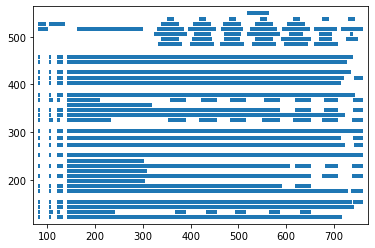

,0,1,2,3,4,5,6,7,8,9,10
0,,,,(En $ de 2022),,(En $ de 2022),(En $ de 2022),(En $ de 2023),(En $ de 2023),(En $ de 2023),
1,,,268,,Orquestas Sinfónicas Juveniles e Infantiles de...,,,,,,
2,,,269,,Centro Cultural Palacio de la Moneda,,,,,,
3,,,279,,Corporación Centro Cultural Gabriela Mistral,,,,,,
4,,,290,,Otras Instituciones Colaboradoras,,,,,,"0,0 %"
5,,,291,,Parque Cultural Valparaíso,,,,,,
6,,,292,,Programa de Orquestas Regionales Profesionales,,,,,,
7,,02,,Al Gobierno Central\n5.577.459,,5.577.459,4.598.284,6.038.341,5.733.128,-305.213,"-5,1 %"
8,,,,Secretaría General de Gobierno-Consejo Naciona...,,,,,,,
9,,,001,,Televisión,,,,4.582.763,-305.213,"-6,2 %"


In [938]:
tables = camelot.read_pdf('analiticos/302.pdf', flavor='stream', table_areas=['5,490,800,5'], columns=['90, 125,140,390,400,470,530,595,670, 750'], splitext=True, pages='1,2,3')
w = 0
# for table in tables: 
#     display(table.df)
# tabla.drop(columns=[5,7,9,11], inplace=True)
# tabla.columns = list(range(len(tabla.keys())))
# tabla[10] = ''
# tabla.at[0,10] = 'campo10'
tabla = tables[1].df
camelot.plot(tables[1])
plt.show()
tabla

In [925]:
from posixpath import splitext
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
pages = ','.join(str(e) for e in list(range(1, lista10[lista10[1]=='302.pdf'][0].values[0]+1)))
tables = camelot.read_pdf('analiticos/21.pdf', flavor='stream', pages=pages, columns=['60, 75,108,300,370,450,510,600,670, 750'], splitext=True)
w = 0
for table in tables: 
    if w == 0:
        tabla = table.df
    else:
        tabla = pd.concat([tabla, table.df[4:]], axis=0)
    w+=1
# tabla.drop(columns=[5,7,9,11], inplace=True)
# tabla.columns = list(range(len(tabla.keys())))
# tabla[10] = ''
# tabla.at[0,10] = 'campo10'
# camelot.plot(tables[0])
# plt.figure(figsize=(10,40))
# plt.show()
# tabla = tables[3].df
display(tabla)

IndexError: list index out of range

In [989]:
tables = tabula.read_pdf('analiticos/260.pdf', output_format="dataframe", stream=True, pages=2)
tabla = tables[0].fillna('')
# tabla['Unnamed: 2'] = tabla['Unnamed: 1']
# tabla['Unnamed: 1'] = tabla['Unnamed: 0']
# tabla.at[5,'Unnamed: 0'] = ''
# tabla.at[6,'Unnamed: 0'] = ''
# tabla.at[7,'Unnamed: 0'] = ''
# tabla.at[8,'Unnamed: 1'] = ''
# tabla.columns = list(range(len(tabla.keys())))
# tabla.loc[tabla[1].str.contains(r'[0-9][0-9][0-9]'), len(tabla.keys())] = tabla[1]
# tabla[10].fillna('', inplace=True)
# for i in range(len(tabla)):
#     tabla.at[i,1] = tabla.at[i,1].replace(tabla.at[i,10], '')
# tabla = tabla.reindex(columns=[0,1,10,2,3,4,5,6,7,8,9])
# tabla.columns = list(range(len(tabla.keys())))
tabla

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,(1),(2),(3),(4),(5),(6),(7)
0,Sub-,Item,Asig.,,AÑO 2022,AÑO 2022,AÑO 2022,AÑO 2022,AÑO 2023,,
1,Título,,,CLASIFICACIÓN PRESUPUESTARIA,LEY DE PPTOS,PRESUPUESTO,EJECUCIÓN,LEY DE PPTOS,PROYECTO DE,VARIACIÓN,VARIACIÓN
2,,,,,(Inicial+Reaj.+Leyes,VIGENTE,AL 31 DE,(Inicial+Reaj.+Leyes,LEY DE,Monto $,%
3,,,,,Especiales),A AGOSTO,AGOSTO,Especiales),PRESUPUESTOS,(5) - (4),(6) / (4)
4,,,,,(En $ de 2022) **,(En $ de 2022),(En $ de 2022),(En $ de 2023) **,(En $ de 2023),(En $ de 2023),
5,,,996,Red Integral de Protección Social,4 3 9. 6 0 5,4 4 1 . 9 7 9,2 1 6 . 5 8 9,4 6 7 . 30 0,461.585,-5.715,"-1,2 %"
6,,,998,Programa Noche Digna,9 . 8 41 . 0 7 1,2 4 . 1 1 5 . 1 9 9,1 5 . 4 8 0 . 3 4 8,1 0 . 4 6 1. 0 5 9,18.755.865,8.294.806,"79,3 %"
7,,07,,A Organismos Internacionales,6.786,12.459,12.203,7.214,7.214,,"0,0 %"
8,,,001,Cuotas a Organismos Internacionales,6 . 7 8 6,1 2 . 4 59,1 2 . 2 0 3,7 . 2 1 4,7.214,,"0,0 %"
9,25,,,INTEGROS AL FISCO,10,10,,10,10,,"0,0 %"


In [1001]:

temporal = lista10[lista10[1]=='260.pdf']
w = 0
for i in range(1, temporal[0].values[0]+1): 
    if w == 0:
        tables = tabula.read_pdf('analiticos/' + temporal[1].values[0], output_format="dataframe", stream=True, pages=i)
        tabla = tables[0].fillna('')
        tabla.columns = list(range(len(tabla.keys())))
        display(tabla)
        
    else:
        tables = tabula.read_pdf('analiticos/' + temporal[1].values[0], output_format="dataframe", stream=True, pages=i)
        tabla2 = tables[0].fillna('')
        
        tabla2.columns = list(range(len(tabla2.keys())))
        tabla = pd.concat([tabla, tabla2[4:]], axis=0)
        display(tabla)
    w+=1
tabla

,0,1,2,3,4,5,6,7,8,9,10
0,Sub-,Item,Asig.,,AÑO 2022,AÑO 2022,AÑO 2022,AÑO 2022,AÑO 2023,,
1,Título,,,CLASIFICACIÓN PRESUPUESTARIA,LEY DE PPTOS,PRESUPUESTO,EJECUCIÓN,LEY DE PPTOS,PROYECTO DE,VARIACIÓN,VARIACIÓN
2,,,,,(Inicial+Reaj.+Leyes,VIGENTE,AL 31 DE,(Inicial+Reaj.+Leyes,LEY DE,Monto $,%
3,,,,,Especiales),A AGOSTO,AGOSTO,Especiales),PRESUPUESTOS,(5) - (4),(6) / (4)
4,,,,,(En $ de 2022) **,(En $ de 2022),(En $ de 2022),(En $ de 2023) **,(En $ de 2023),(En $ de 2023),
5,,,,INGRESOS,254.719.754,299.838.797,207.525.454,270.674.545,350.232.516,79.557.971,"22,7 %"
6,08,,,OTROS INGRESOS CORRIENTES,510,43.848,1.315.776,510,30,-480,"-94,1 %"
7,,,,Recuperaciones y Reembolsos por Licencias,,,,,,,
8,,01,,,10,10,439.890,10,10,,"0,0 %"
9,,,,Médicas,,,,,,,


,0,1,2,3,4,5,6,7,8,9,10
0,Sub-,Item,Asig.,,AÑO 2022,AÑO 2022,AÑO 2022,AÑO 2022,AÑO 2023,,
1,Título,,,CLASIFICACIÓN PRESUPUESTARIA,LEY DE PPTOS,PRESUPUESTO,EJECUCIÓN,LEY DE PPTOS,PROYECTO DE,VARIACIÓN,VARIACIÓN
2,,,,,(Inicial+Reaj.+Leyes,VIGENTE,AL 31 DE,(Inicial+Reaj.+Leyes,LEY DE,Monto $,%
3,,,,,Especiales),A AGOSTO,AGOSTO,Especiales),PRESUPUESTOS,(5) - (4),(6) / (4)
4,,,,,(En $ de 2022) **,(En $ de 2022),(En $ de 2022),(En $ de 2023) **,(En $ de 2023),(En $ de 2023),
...,...,...,...,...,...,...,...,...,...,...,...
22,,01,,Amortización Deuda Interna,566.954,566.954,410.159,566.954,680.258,113.304,"20,0 %"
23,,03,,Intereses Deuda Interna,902.309,902.309,488.063,902.309,750.609,-151.700,"-16,8 %"
24,,07,,Deuda Flotante,10,6.992.210,6.987.491,10,10,,"0,0 %"
25,35,,,SALDO FINAL DE CAJA,,1,,,,,


,0,1,2,3,4,5,6,7,8,9,10
0,Sub-,Item,Asig.,,AÑO 2022,AÑO 2022,AÑO 2022,AÑO 2022,AÑO 2023,,
1,Título,,,CLASIFICACIÓN PRESUPUESTARIA,LEY DE PPTOS,PRESUPUESTO,EJECUCIÓN,LEY DE PPTOS,PROYECTO DE,VARIACIÓN,VARIACIÓN
2,,,,,(Inicial+Reaj.+Leyes,VIGENTE,AL 31 DE,(Inicial+Reaj.+Leyes,LEY DE,Monto $,%
3,,,,,Especiales),A AGOSTO,AGOSTO,Especiales),PRESUPUESTOS,(5) - (4),(6) / (4)
4,,,,,(En $ de 2022) **,(En $ de 2022),(En $ de 2022),(En $ de 2023) **,(En $ de 2023),(En $ de 2023),
...,...,...,...,...,...,...,...,...,...,...,...
22,,01,,Amortización Deuda Interna,566.954,566.954,410.159,566.954,680.258,113.304,"20,0 %"
23,,03,,Intereses Deuda Interna,902.309,902.309,488.063,902.309,750.609,-151.700,"-16,8 %"
24,,07,,Deuda Flotante,10,6.992.210,6.987.491,10,10,,"0,0 %"
25,35,,,SALDO FINAL DE CAJA,,1,,,,,


In [997]:
temporal[0].values[0]

2